In [39]:
#importing all modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [40]:
#reading the csv file into a dataframe
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [41]:
#checking number of rows and columns of dataframe
df.shape


(158, 12)

There are 158 rows and 12 columns in this dataset

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

'Country' and 'Region ' columns are of object data type, 'Happiness Rank' is of integer datatype and rest all coulmns are of float data type. And we can observe that no null values are present.

In [43]:
#verify that null values are not present in dataframe
df.isnull().sum()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Its verified that no null values are present in this dataset

In [44]:
#statistical summary
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


For every columns count is 158 which means no null values in column. There is no much difference between mean and 50%(2 nd quartile). This means outliers are not present in this dataframe.

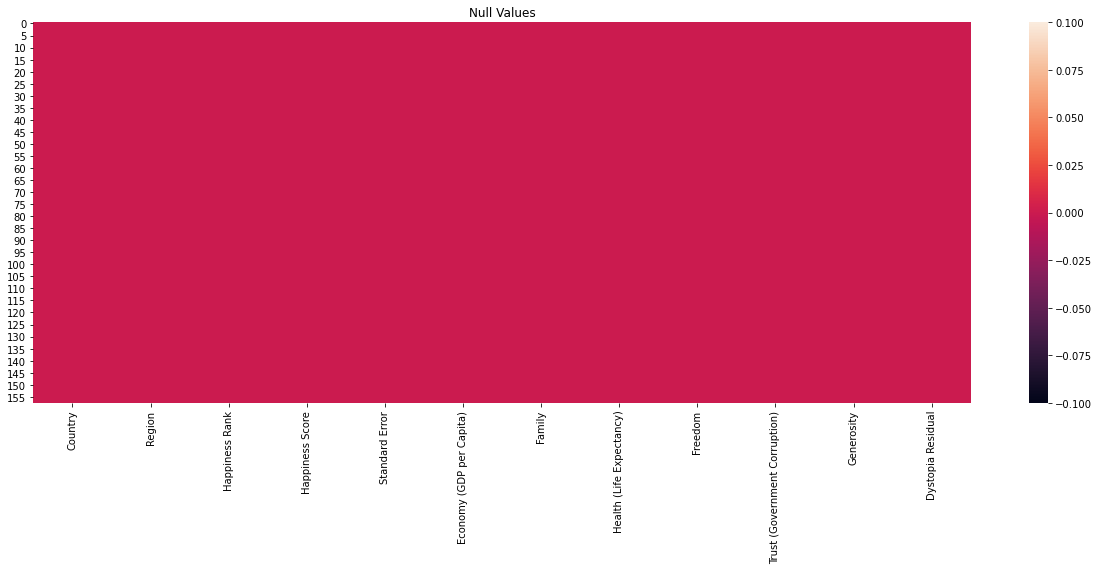

In [45]:
#creating heatmap for checking null values
plt.figure(figsize=(21,7))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [46]:
#correlation matrix
corr_mat=df.corr()
corr_mat

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Positive values indicate postive relationship and negative values indicate negative relationship. Values greater than +0.5 means strong poitive replationship
and values smaller than -0.5 indicates strong negative relationship

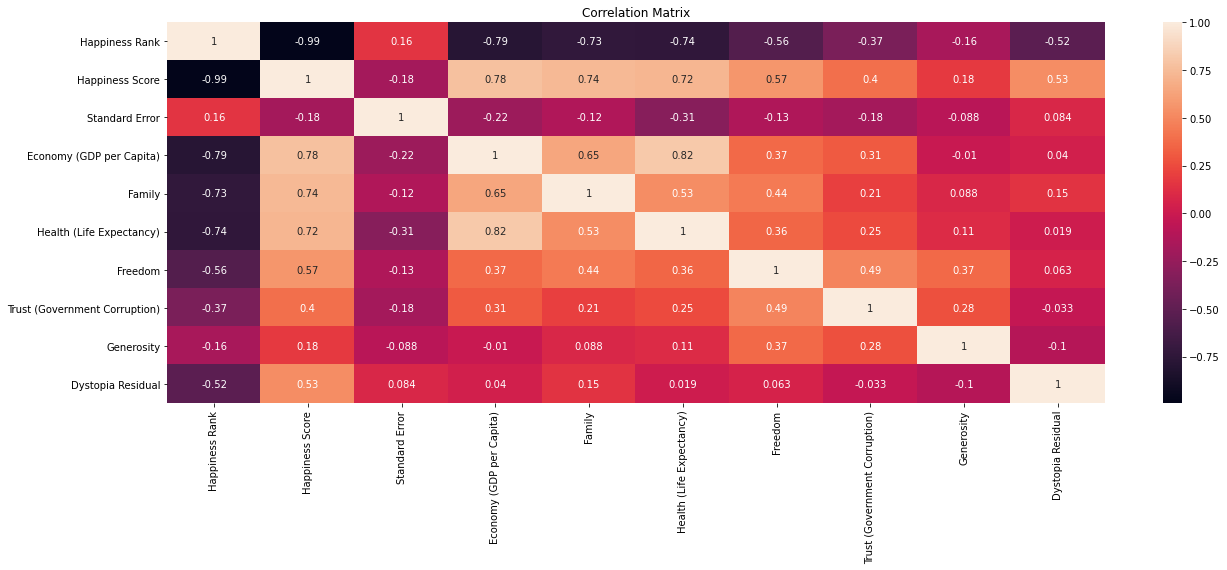

In [47]:
#we can create the heatmap of this correlation matrix also.
plt.figure(figsize=(21,7))
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

We want to predict Happiness Score, so our dependent variable here is Score other features such as GPD Support Health, etc., are our independent variables.

This scatter plot indicates a strong negative relationship.

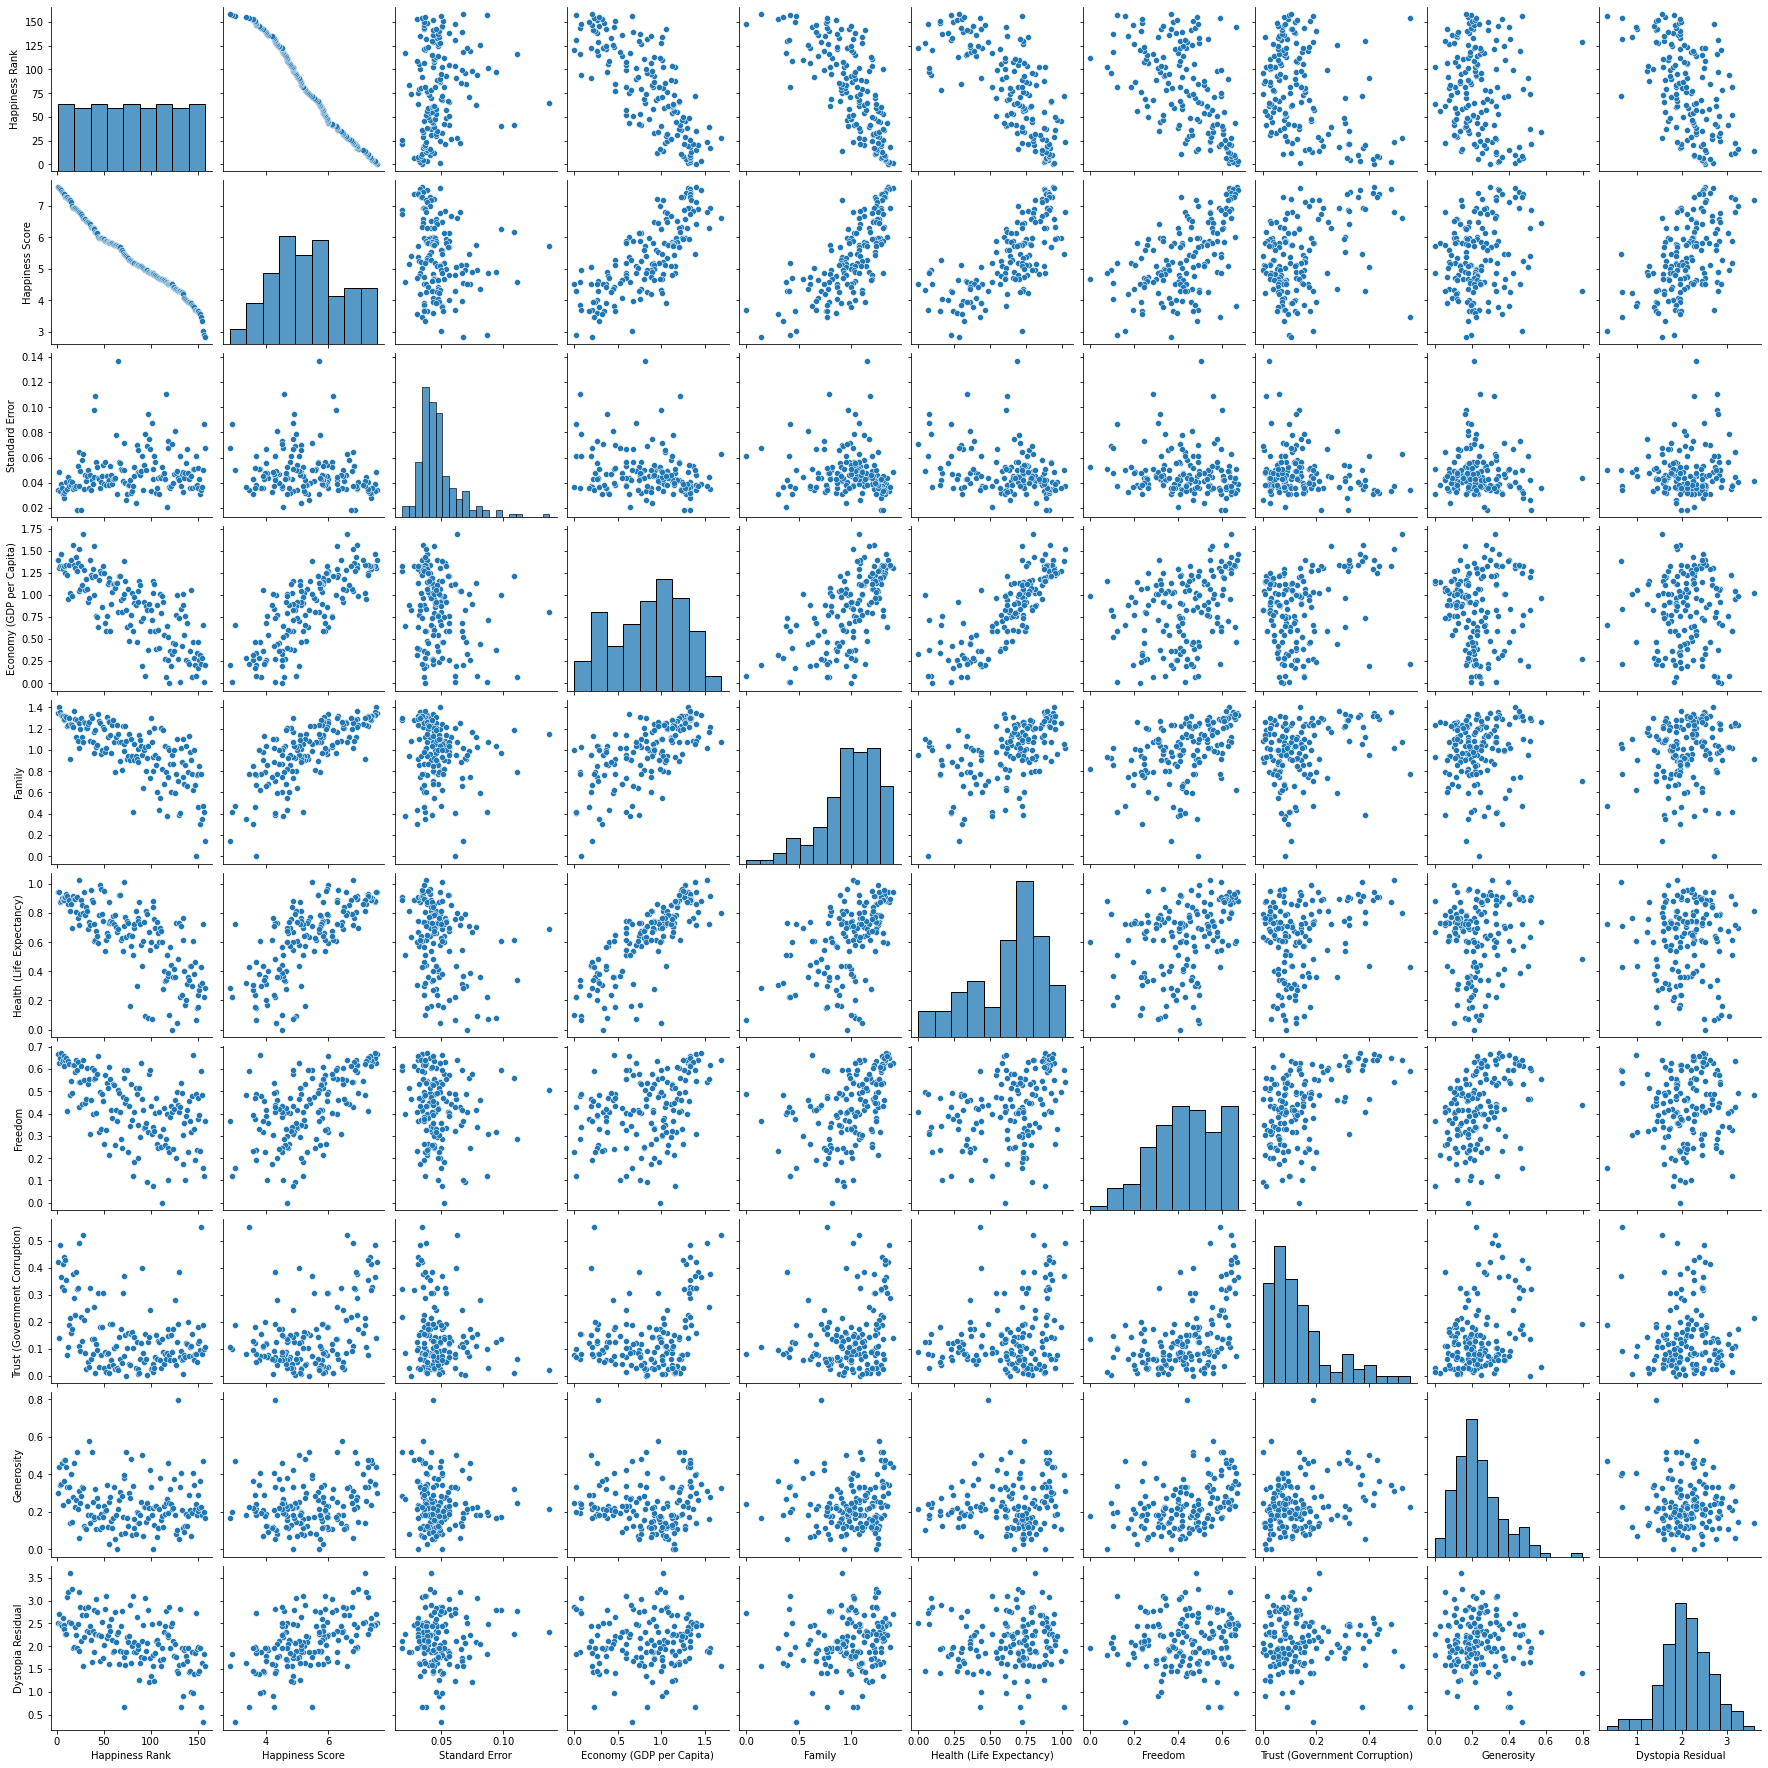

In [14]:
#multivariate analysis
sns.pairplot(df)
plt.show()

we define an empty dataframe. This dataframeincludes Root Mean Squared Error (RMSE), R-squared, Adjusted R-squared, and mean of the R-squared values obtained by the k-Fold Cross-Validation, which are the essential metrics to compare different models. Having an R-squared value closer to one and smaller RMSE means a better fit. In the following sections, we will fill this dataframe with the results.

In [55]:
dropped_happy=df.drop(['Country','Happiness Rank','Region'],axis=1)
feature_data2=dropped_happy.drop("Happiness Score",axis=1)
target_data2=dropped_happy['Happiness Score']
reg=LinearRegression()
dropped_happy.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


we import sklearn’s linear regression too create something similar to a “line of best fit” for our variables. We can find the intercept, and our coefficients 

In [56]:
X=dropped_happy.drop("Happiness Score",axis=1)
lm=LinearRegression()
lm.fit(X,dropped_happy['Happiness Score'])

LinearRegression()

In [57]:
print("Estimated Regression is ",lm.intercept_)

Estimated Regression is  7.401141772778175e-05


In [59]:
print("The number of coefficients ",lm.coef_)

The number of coefficients  [-1.75982878e-04  1.00010232e+00  9.99970526e-01  9.99877780e-01
  9.99695750e-01  9.99915961e-01  1.00006100e+00  1.00003081e+00]


In [60]:
coef=zip(X.columns,lm.coef_)
coef_df=pd.DataFrame(list(zip(X.columns,lm.coef_)),columns=['Features','Coefficients'])
coef_df

,Features,Coefficients
0,Standard Error,-0.000176
1,Economy (GDP per Capita),1.000102
2,Family,0.999971
3,Health (Life Expectancy),0.999878
4,Freedom,0.999696
5,Trust (Government Corruption),0.999916
6,Generosity,1.000061
7,Dystopia Residual,1.000031


Using sklearn.predict, we can use this model to predict the happiness scores for the first 100 countries in our model.

In [61]:
lm.predict(X)[:100]

array([7.58687393, 7.56086815, 7.52699615, 7.52215171, 7.42687699,
       7.40600792, 7.37809917, 7.36361297, 7.2859942 , 7.28397913,
       7.27769897, 7.22570406, 7.19980975, 7.18729964, 7.11950016,
       6.98257107, 6.94617825, 6.94021123, 6.9373352 , 6.90131913,
       6.86719525, 6.85292821, 6.8102164 , 6.79772833, 6.78623143,
       6.75011631, 6.6696767 , 6.61123583, 6.57503675, 6.57405107,
       6.50507421, 6.48510122, 6.47677041, 6.45467371, 6.41114035,
       6.32891961, 6.30240062, 6.2981499 , 6.29475955, 6.26924898,
       6.16768713, 6.13015671, 6.12277924, 6.00271517, 5.99509226,
       5.98705183, 5.98374999, 5.97522064, 5.95964277, 5.94818723,
       5.88973648, 5.88900996, 5.87831189, 5.85520207, 5.84765038,
       5.83265937, 5.82827432, 5.82411781, 5.81251728, 5.79059128,
       5.77040957, 5.75860463, 5.75438653, 5.71586271, 5.70884392,
       5.69528734, 5.68873658, 5.60463202, 5.58863928, 5.5481399 ,
       5.47702907, 5.47377359, 5.42855893, 5.39872122, 5.36026

 we have a plot of our actual happiness score versus the predicted happiness score. You can see that our model is a pretty good indicator of the actual happiness score! There are very small residuals, and there is a strong positive correlation between the two variables.

To do further testing on our model, we can look for the mean absolute error. This is the difference between two continuous variables, the lower the score, the better our model is at making predictions

Perhaps we do not need all seven variables to predict happiness score. When we find the mean absolute error, we can see that the score is around 0.77. While this isn’t too bad, and if we wanted to, we can use just one or two variables, to get a better predicted happiness score, it would probably be beneficial to use the prior than the latter.

In [67]:
msehappy=np.mean((dropped_happy['Happiness Score']-lm.predict(X))**2)
msehappy

7.554105811037006e-08

In [68]:
lm2=LinearRegression()
lm2.fit(X[['Family']],dropped_happy['Happiness Score'])

LinearRegression()

In [73]:
msefamily=np.mean((dropped_happy['Happiness Score']-lm2.predict(X[['Family']]))**2)
print(msefamily)

0.5881969569191736


we finally have a model that we can perhaps use:
Happiness Score= 0.0001289 + 1.000041ecomomy + 1.000005family + 0.999869health + 0.999912freedom + 1.000020trust + 1.000006generosity + 0.999972DystopiaResidual

In conclusion, our happiness score for world happiness can be used using the model above. By using sklearn, we have build a preliminary machine learning tool that will help us generate country scores, and the higher the score, the more highly ranked the happiness of that country will be.